### Tokenization
  * Tokenization is the process of splitting input sequence into TOKENS. The words are an example of tokens in a sentence.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

* A word is a meaningful sequence of characters.
* Word boundaries in English are spaces or punctuation.
* In German there are compound words which are written without spaces
  * “Rechtsschutzversicherungsgesellschaften” stands for “insurance companies which provide legal protection”
* In Japanese there are no spaces at all!
  * Butyoucanstillreaditright?  
  
####  Tokenization is a process that splits input sequence into tokens
  * Token as useful unit for semantic processing, they can be a word, sentence, paragraph, etc.  

In [2]:
test_seq = "Andrew Ng is datajango's guru, isn't it. Anderw is a professor in Stanford University, San Francisco, California."

In [3]:
from nltk.tokenize import WordPunctTokenizer
wp_tokenizer = WordPunctTokenizer()
tokens = wp_tokenizer.tokenize(test_seq)
print(tokens)

['Andrew', 'Ng', 'is', 'datajango', "'", 's', 'guru', ',', 'isn', "'", 't', 'it', '.', 'Anderw', 'is', 'a', 'professor', 'in', 'Stanford', 'University', ',', 'San', 'Francisco', ',', 'California', '.']


In [4]:
from nltk.tokenize import TreebankWordTokenizer
tb_tokenizer = TreebankWordTokenizer()
tokens = tb_tokenizer.tokenize(test_seq)
print(tokens)

['Andrew', 'Ng', 'is', 'datajango', "'s", 'guru', ',', 'is', "n't", 'it.', 'Anderw', 'is', 'a', 'professor', 'in', 'Stanford', 'University', ',', 'San', 'Francisco', ',', 'California', '.']


In [5]:
len(tokens)

23

In [6]:
from nltk.tokenize import WhitespaceTokenizer
whp_tokenizer = WhitespaceTokenizer()
tokens = whp_tokenizer.tokenize(test_seq)
print(tokens)

['Andrew', 'Ng', 'is', "datajango's", 'guru,', "isn't", 'it.', 'Anderw', 'is', 'a', 'professor', 'in', 'Stanford', 'University,', 'San', 'Francisco,', 'California.']


### Stanford Core NLP 
  * https://github.com/nltk/nltk/wiki/Stanford-CoreNLP-API-in-NLTK
  * https://stanfordnlp.github.io/CoreNLP/
  * Stanford CoreNLP is written in Java; recent releases require Java 1.8+ (https://www.oracle.com/technetwork/java/javaee/downloads/jdk8-downloads-2133151.html). You need to have Java installed to run CoreNLP. However, you can interact with CoreNLP via the command-line or its web service; many people use CoreNLP while writing their own code in Javascript, Python, or some other language.
    * goto stanford-corenlp-full
    * java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -preload tokenize,ssplit,pos,lemma,ner,parse,depparse -status_port 9000 -port 9000 -timeout 15000 & 

In [7]:
# from nltk.tokenize.stanford import StanfordTokenizer depricated
from nltk.parse.corenlp import CoreNLPParser 
st_parser = CoreNLPParser(url='http://localhost:9000')
#st_parser = CoreNLPParser(url='http://[::]:9000/')
tokens = st_parser.tokenize(test_seq)
print(tokens)

<generator object GenericCoreNLPParser.tokenize at 0x00000213A2D83040>


##### Generator: "yield" key word makes a method generator

In [8]:
def squares(nums):
    sqr = []
    for n in nums:
        sqr.append(n**2)
    return sqr

print(squares([1,2,3,4]))

[1, 4, 9, 16]


In [9]:
def squares(nums):
    for n in nums:
        yield n**2

for n in squares([1,2,3,4]):
    print(n)

1
4
9
16


In [10]:
tokens_lst =[x for x in tokens]
print(tokens_lst)

['Andrew', 'Ng', 'is', 'datajango', "'s", 'guru', ',', 'is', "n't", 'it', '.', 'Anderw', 'is', 'a', 'professor', 'in', 'Stanford', 'University', ',', 'San', 'Francisco', ',', 'California', '.']


In [ ]:
len(tokens_lst)

In [ ]:
data = pd.read_csv('C:/Users/thisi/Workspace/AI_dataset/HPC_data/health_care_news_data.csv')

In [14]:
data.shape

(8577, 12)

In [13]:
data.columns

Index(['_id', 'crawlDate', 'headline', 'embargoDate', 'sourceUrl',
       'description', 'cureType', 'publishedDate', 'isLead', 'state', 'docId',
       'id'],
      dtype='object')

In [15]:
data_set = data[['headline','description']]

In [16]:
data_set.shape

(8577, 2)

#### Analyse data: Let's have a look at one article
  * Observation 1: We have some special characters and words such as '\n', '“', '\t', 'PF-06651600', etc.
  * We should definetly remore special charactes such as '\n', '“', '\t' before we proceed further.

In [18]:
sample_text = data_set['description'][0]
print(sample_text)

2017-12-14 00:00:00

Global program to commence with pivotal study B7451012 in North America, Australia and Europe; broader regional rollout in 2018
Thursday, December 14, 2017 - 7:30amESTPfizer Inc. (NYSE:PFE) today announced the initiation of a Phase 3 program for its once-daily Janus kinase 1 (JAK1) inhibitor PF-04965842, to evaluate the efficacy and safety of PF-04965842 for the treatment of moderate-to-severe atopic dermatitis (AD). This is the first trial in the JAK1 Atopic Dermatitis Efficacy and safety (JADE) global development program.
“By initiating this Phase 3 program in atopic dermatitis, we hope to provide a new potential treatment option for people suffering with this condition,” said Michael Corbo, Chief Development Officer, Inflammation & Immunology, Pfizer Global Product Development. “Pfizer continues to build a leadership position in inflammation and immunology research with the advancement of this important, Pfizer-discovered investigational oral JAK1 inhibitor.”
Ab

#### Let's find non-alpha/neumerics

In [34]:
search_result = re.findall('[\t\n\r\f\v]', sample_text)

In [35]:
search_result

['\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\t',
 '\t',
 '\n',
 '\n',
 '\t',
 '\t',
 '\n',
 '\n',
 '\t',
 '\t',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\t',
 '\n',
 '\t',
 '\n',
 '\t',
 '\n',
 '\t']

In [36]:
sample_text = re.sub('[\t\n\r\f\v\"]', ' ',sample_text)

In [37]:
re.findall('[\t\n\r\f\v]', sample_text)

[]

In [38]:
sample_text

"2017-12-14 00:00:00  Global program to commence with pivotal study B7451012 in North America, Australia and Europe; broader regional rollout in 2018 Thursday, December 14, 2017 - 7:30amESTPfizer Inc. (NYSE:PFE) today announced the initiation of a Phase 3 program for its once-daily Janus kinase 1 (JAK1) inhibitor PF-04965842, to evaluate the efficacy and safety of PF-04965842 for the treatment of moderate-to-severe atopic dermatitis (AD). This is the first trial in the JAK1 Atopic Dermatitis Efficacy and safety (JADE) global development program. “By initiating this Phase 3 program in atopic dermatitis, we hope to provide a new potential treatment option for people suffering with this condition,” said Michael Corbo, Chief Development Officer, Inflammation & Immunology, Pfizer Global Product Development. “Pfizer continues to build a leadership position in inflammation and immunology research with the advancement of this important, Pfizer-discovered investigational oral JAK1 inhibitor.” A

In [39]:
re.findall(r'Contact:[\s\w,\-\d\[\]\:]*', sample_text, re.I)

['Contact: Media:  Neha Wadhwa, 212-733-2835[email protected]  or  Investors:  Ryan Crowe, 212-733-8160[email protected]']

In [40]:
sample_text = re.sub(r'Contact:[\s\w,\-\d\[\]\:]*', ' ',sample_text)

In [41]:
sample_text

"2017-12-14 00:00:00  Global program to commence with pivotal study B7451012 in North America, Australia and Europe; broader regional rollout in 2018 Thursday, December 14, 2017 - 7:30amESTPfizer Inc. (NYSE:PFE) today announced the initiation of a Phase 3 program for its once-daily Janus kinase 1 (JAK1) inhibitor PF-04965842, to evaluate the efficacy and safety of PF-04965842 for the treatment of moderate-to-severe atopic dermatitis (AD). This is the first trial in the JAK1 Atopic Dermatitis Efficacy and safety (JADE) global development program. “By initiating this Phase 3 program in atopic dermatitis, we hope to provide a new potential treatment option for people suffering with this condition,” said Michael Corbo, Chief Development Officer, Inflammation & Immunology, Pfizer Global Product Development. “Pfizer continues to build a leadership position in inflammation and immunology research with the advancement of this important, Pfizer-discovered investigational oral JAK1 inhibitor.” A

##  Tockenization & Understanding Features
#### Let's understand Tokenizers a little bit before applying them on our data

In [42]:
import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import RegexpTokenizer

In [47]:
#regx_tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

In [48]:
regx_tokenizer = RegexpTokenizer('\S+')

In [49]:
regx_tokens = regx_tokenizer.tokenize(sample_text)

In [50]:
print(regx_tokens)

['2017-12-14', '00:00:00', 'Global', 'program', 'to', 'commence', 'with', 'pivotal', 'study', 'B7451012', 'in', 'North', 'America,', 'Australia', 'and', 'Europe;', 'broader', 'regional', 'rollout', 'in', '2018', 'Thursday,', 'December', '14,', '2017', '-', '7:30amESTPfizer', 'Inc.', '(NYSE:PFE)', 'today', 'announced', 'the', 'initiation', 'of', 'a', 'Phase', '3', 'program', 'for', 'its', 'once-daily', 'Janus', 'kinase', '1', '(JAK1)', 'inhibitor', 'PF-04965842,', 'to', 'evaluate', 'the', 'efficacy', 'and', 'safety', 'of', 'PF-04965842', 'for', 'the', 'treatment', 'of', 'moderate-to-severe', 'atopic', 'dermatitis', '(AD).', 'This', 'is', 'the', 'first', 'trial', 'in', 'the', 'JAK1', 'Atopic', 'Dermatitis', 'Efficacy', 'and', 'safety', '(JADE)', 'global', 'development', 'program.', '“By', 'initiating', 'this', 'Phase', '3', 'program', 'in', 'atopic', 'dermatitis,', 'we', 'hope', 'to', 'provide', 'a', 'new', 'potential', 'treatment', 'option', 'for', 'people', 'suffering', 'with', 'this',

In [51]:
from nltk.tokenize import SpaceTokenizer
space_tokenizer = SpaceTokenizer()
space_tokens = space_tokenizer.tokenize(sample_text)
print(space_tokens)

['2017-12-14', '00:00:00', '', 'Global', 'program', 'to', 'commence', 'with', 'pivotal', 'study', 'B7451012', 'in', 'North', 'America,', 'Australia', 'and', 'Europe;', 'broader', 'regional', 'rollout', 'in', '2018', 'Thursday,', 'December', '14,', '2017', '-', '7:30amESTPfizer', 'Inc.', '(NYSE:PFE)', 'today', 'announced', 'the', 'initiation', 'of', 'a', 'Phase', '3', 'program', 'for', 'its', 'once-daily', 'Janus', 'kinase', '1', '(JAK1)', 'inhibitor', 'PF-04965842,', 'to', 'evaluate', 'the', 'efficacy', 'and', 'safety', 'of', 'PF-04965842', 'for', 'the', 'treatment', 'of', 'moderate-to-severe', 'atopic', 'dermatitis', '(AD).', 'This', 'is', 'the', 'first', 'trial', 'in', 'the', 'JAK1', 'Atopic', 'Dermatitis', 'Efficacy', 'and', 'safety', '(JADE)', 'global', 'development', 'program.', '“By', 'initiating', 'this', 'Phase', '3', 'program', 'in', 'atopic', 'dermatitis,', 'we', 'hope', 'to', 'provide', 'a', 'new', 'potential', 'treatment', 'option', 'for', 'people', 'suffering', 'with', 'th

In [52]:
from nltk.parse.corenlp import CoreNLPParser 

In [53]:
st_parser = CoreNLPParser(url='http://localhost:9000')
st_tokens = st_parser.tokenize(sample_text)
print(st_tokens)

<generator object GenericCoreNLPParser.tokenize at 0x0000022CB2B3FE58>


In [54]:
print(type(st_tokens))

<class 'generator'>


In [55]:
st_tokens_lst =[x for x in st_tokens]
print(st_tokens_lst)

['2017-12-14', '00:00:00', 'Global', 'program', 'to', 'commence', 'with', 'pivotal', 'study', 'B7451012', 'in', 'North', 'America', ',', 'Australia', 'and', 'Europe', ';', 'broader', 'regional', 'rollout', 'in', '2018', 'Thursday', ',', 'December', '14', ',', '2017', '-', '7:30', 'amESTPfizer', 'Inc.', '(', 'NYSE', ':', 'PFE', ')', 'today', 'announced', 'the', 'initiation', 'of', 'a', 'Phase', '3', 'program', 'for', 'its', 'once-daily', 'Janus', 'kinase', '1', '(', 'JAK1', ')', 'inhibitor', 'PF-04965842', ',', 'to', 'evaluate', 'the', 'efficacy', 'and', 'safety', 'of', 'PF-04965842', 'for', 'the', 'treatment', 'of', 'moderate-to-severe', 'atopic', 'dermatitis', '(', 'AD', ')', '.', 'This', 'is', 'the', 'first', 'trial', 'in', 'the', 'JAK1', 'Atopic', 'Dermatitis', 'Efficacy', 'and', 'safety', '(', 'JADE', ')', 'global', 'development', 'program', '.', '“', 'By', 'initiating', 'this', 'Phase', '3', 'program', 'in', 'atopic', 'dermatitis', ',', 'we', 'hope', 'to', 'provide', 'a', 'new', '

In [36]:
freqDist = nltk.FreqDist(st_tokens_lst)

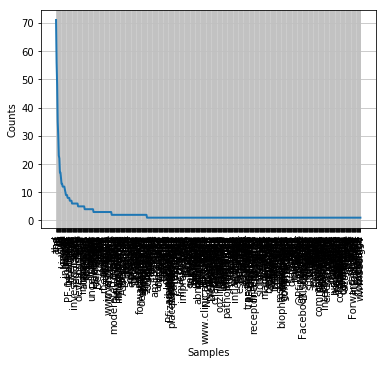

In [37]:
freqDist.plot()

In [38]:
from collections import Counter
token_counts = Counter(st_tokens_lst)
print(token_counts)

Counter({',': 71, 'and': 56, 'the': 48, 'of': 35, '.': 30, 'in': 23, 'to': 22, '(': 17, ')': 17, 'for': 15, 'with': 13, 'as': 13, 'a': 12, 'kinase': 12, 'or': 12, 'on': 12, 'Pfizer': 11, 'inhibitor': 10, 'safety': 9, 'be': 9, 'that': 9, ';': 8, 'Phase': 8, 'PF-04965842': 8, 'at': 8, 'treatment': 7, 'is': 7, 'other': 7, 'therapies': 7, ':': 6, 'JAK1': 6, 'trial': 6, 'investigational': 6, 'such': 6, 'by': 6, 'our': 6, 'may': 6, 'regulatory': 6, 'data': 6, 'any': 6, 'study': 5, '3': 5, 'development': 5, '“': 5, 'this': 5, 'we': 5, '”': 5, 'will': 5, 'including': 5, 'information': 5, 'clinical': 5, 'authorities': 5, 'program': 4, 'Atopic': 4, 'potential': 4, 'research': 4, 'patients': 4, '12': 4, 'The': 4, '2': 4, 'under': 4, 'results': 4, 'world': 4, 'health': 4, 'care': 4, 'us': 4, 'uncertainties': 4, 'whether': 4, 'Global': 3, 'December': 3, '2017': 3, 'its': 3, 'efficacy': 3, 'atopic': 3, 'dermatitis': 3, 'AD': 3, 'This': 3, 'Dermatitis': 3, 'global': 3, 'new': 3, 'About': 3, 'are': 3,

In [39]:
def dict_with_frequency(low, high):
    freq_words = {x:token_counts[x] for x in token_counts if token_counts[x] > low and token_counts[x] < high}
    return freq_words

##### High frequency words

In [40]:
high_freq_words = dict_with_frequency(6, 100)
print(high_freq_words)

{'to': 22, 'with': 13, 'in': 23, ',': 71, 'and': 56, ';': 8, '(': 17, ')': 17, 'the': 48, 'of': 35, 'a': 12, 'Phase': 8, 'for': 15, 'kinase': 12, 'inhibitor': 10, 'PF-04965842': 8, 'safety': 9, 'treatment': 7, '.': 30, 'is': 7, 'Pfizer': 11, 'be': 9, 'or': 12, 'at': 8, 'as': 13, 'on': 12, 'that': 9, 'other': 7, 'therapies': 7}


##### Mid frequency words

In [41]:
mid_freq_words = dict_with_frequency(2, 7)
print(mid_freq_words)

{'Global': 3, 'program': 4, 'study': 5, 'December': 3, '2017': 3, ':': 6, '3': 5, 'its': 3, 'JAK1': 6, 'efficacy': 3, 'atopic': 3, 'dermatitis': 3, 'AD': 3, 'This': 3, 'trial': 6, 'Atopic': 4, 'Dermatitis': 3, 'global': 3, 'development': 5, '“': 5, 'this': 5, 'we': 5, 'new': 3, 'potential': 4, '”': 5, 'research': 4, 'investigational': 6, 'About': 3, 'patients': 4, '12': 4, 'will': 5, 'The': 4, 'are': 3, '2': 4, 'from': 3, 'their': 3, 'such': 6, 'under': 4, 'results': 4, 'by': 6, '’s': 3, 'multiple': 3, 'including': 5, 'We': 3, 'alopecia': 3, 'rheumatoid': 3, 'arthritis': 3, 'which': 3, 'could': 3, 'additional': 3, 'A': 3, 'investigation': 3, 'world': 4, 'our': 6, 'health': 4, 'care': 4, 'well': 3, 'us': 4, 'information': 5, 'may': 6, 'www.pfizer.com': 3, 'release': 3, 'risks': 3, 'uncertainties': 4, 'clinical': 5, 'regulatory': 6, 'data': 6, 'when': 3, 'authorities': 5, 'whether': 4, 'any': 6, 'Form': 3}


##### Low frequency words

In [42]:
low_freq_words = dict_with_frequency(0, 3)
print(low_freq_words)

{'2017-12-14': 1, '00:00:00': 1, 'commence': 1, 'pivotal': 1, 'B7451012': 2, 'North': 1, 'America': 1, 'Australia': 1, 'Europe': 1, 'broader': 1, 'regional': 1, 'rollout': 1, '2018': 1, 'Thursday': 1, '14': 1, '-': 1, '7:30': 1, 'amESTPfizer': 1, 'Inc.': 1, 'NYSE': 1, 'PFE': 1, 'today': 1, 'announced': 1, 'initiation': 1, 'once-daily': 1, 'Janus': 2, '1': 2, 'evaluate': 2, 'moderate-to-severe': 2, 'first': 1, 'Efficacy': 1, 'JADE': 1, 'By': 1, 'initiating': 1, 'hope': 1, 'provide': 1, 'option': 2, 'people': 2, 'suffering': 1, 'condition': 1, 'said': 2, 'Michael': 2, 'Corbo': 1, 'Chief': 2, 'Development': 2, 'Officer': 2, 'Inflammation': 2, '&': 1, 'Immunology': 2, 'Product': 1, 'continues': 1, 'build': 1, 'leadership': 1, 'position': 1, 'inflammation': 2, 'immunology': 1, 'advancement': 1, 'important': 2, 'Pfizer-discovered': 1, 'oral': 2, 'Trial': 2, 'randomized': 1, 'double-blind': 1, 'placebo-controlled': 1, 'parallel-group': 1, 'designed': 1, '375': 1, 'years': 2, 'older': 1, 'part

In [43]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import PunktSentenceTokenizer

### Text Normalization : Find root words with stemming or lemmatization to reduce number of features. Case conversion (casing) and acronyms
  * **Stemming/Lemmatization -** treat stop words OR high frequency small words. Map single/multiple tokens with terms. Example map window - window, windows; de-accented term - resume.     
    * **Stemming** algorithms work by cutting off the end of the word, and in some cases also the beginning while looking for the root. This indiscriminate cutting can be successful in some occasions, but not always, that is why we affirm that this is an approach that has some limitations.
      * The best-known and most popular stemming approach for English is the Porter stemming algorithm, also known as the Porter stemmer. It is a collection of rules (or, if you prefer, heuristics) designed to reflect how English handles inflections. **For example, the Porter stemmer chops both apple and apples down to appl, and it stems berry and berries to berri.**
      * Porter Stemmer (5 phase stemming), Lovins Stemmer (1 phase stemming). On English, stemming is not a good idea to convert tokens to terms (recall will be high, precision is going to be low). This technique works well with Spanish, Finish, German, etc., language.
        * Phase I rules :
          * SSES -> SS : caresses -> caress
          * IES  -> I  : ponies -> poni

    * **Lemmatization** on the other hand takes into consideration the morphological analysis of the words. To do so it is necessary to have detailed dictionaries the algorithm can look back at to link the form back to its lemma. 
      * Lemmatization does not simply chop off inflections, but instead relies on a lexical knowledge base like ,<a href='https://wordnet.princeton.edu/'> WordNet</a> to obtain the correct base forms of words.
      * For example, WordNet lemmatizes **geese** to **goose**, **meanness to meanness** and **meaning to meaning**. In these examples, it outperforms than the Porter stemmer.
    * **Stemming VS Lemmatization :**  Lemmatization or Stemming has limits. For example, Porter stems both happiness and happy to happi, while WordNet lemmatizes the two words to themselves. The WordNet lemmatizer also requires specifying the word’s part of speech — otherwise, it assumes the word is a noun. Finally, lemmatization cannot handle unknown words: for example, Porter stems both iphone and iphones to iphon, while WordNet lemmatizes both words to themselves. In general, lemmatization offers better precision than stemming, but at the expense of recall.
  
  * Case folding - reduce all letters to lowercase


In [2]:
import nltk

In [4]:
#nltk.download()

In [1]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
print(type(stopwords))

<class 'nltk.corpus.util.LazyCorpusLoader'>


In [4]:
[x for x in stopwords.words('english')]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
corpus = []

#sample_text = re.sub('[^\w\d\-\:]', ' ', sample_text) #substitute non alphabets with space
ps = PorterStemmer()

words = [ps.stem(word) for word in sample_text if not word in set(stopwords.words('english'))]
text_corpus = ''.join(words)
corpus.append(text_corpus)

In [47]:
corpus

["2017-12-14 00:00:00  Glbl prgr  cence wh pvl u B7451012 n Nrh Aerc, Aurl n Eurpe; brer regnl rllu n 2018 Thur, Deceber 14, 2017 - 7:30ESTPfzer Inc. (NYSE:PFE)  nnunce he nn f  Phe 3 prgr fr  nce-l Jnu kne 1 (JAK1) nhbr PF-04965842,  evlue he effcc n fe f PF-04965842 fr he reen f ere--evere pc er (AD). Th  he fr rl n he JAK1 Apc Der Effcc n fe (JADE) glbl evelpen prgr. “B nng h Phe 3 prgr n pc er, we hpe  prve  new penl reen pn fr peple ufferng wh h cnn,”  Mchel Crb, Chef Develpen Offcer, Infln & Iunlg, Pfzer Glbl Pruc Develpen. “Pfzer cnnue  bul  leerhp pn n nfln n unlg reerch wh he vnceen f h prn, Pfzer-cvere nvegnl rl JAK1 nhbr.” Abu he Phe 3 Trl B7451012 Th Phe 3 rl   rnze, uble-bln, plceb-cnrlle, prllel-grup u egne  evlue he effcc n fe f PF-04965842 n 375 pen 12 er n ler wh ere--evere AD. Trl prcpn wll be rnl gne  receve 200 g r 100 g nce l r plceb. The prr enpn re he prprn f pen chevng n Invegr Glbl Aeen (IGA) cre f 0/1 n ≥2 pn prveen, n he prprn f pen wh  le  75% r greer chnge 

In [48]:
from nltk.stem import WordNetLemmatizer

In [49]:
corpus = []

#sample_text = re.sub('[^\w\d\-\:]', ' ', sample_text) #substitute non alphabets with space
lem = WordNetLemmatizer()
words = [lem.lemmatize(word) for word in sample_text if not word in set(stopwords.words('english'))]
text_corpus = ''.join(words)
corpus.append(text_corpus)

In [51]:
print(corpus)

["2017-12-14 00:00:00  Glbl prgr  cence wh pvl u B7451012 n Nrh Aerc, Aurl n Eurpe; brer regnl rllu n 2018 Thur, Deceber 14, 2017 - 7:30ESTPfzer Inc. (NYSE:PFE)  nnunce he nn f  Phe 3 prgr fr  nce-l Jnu kne 1 (JAK1) nhbr PF-04965842,  evlue he effcc n fe f PF-04965842 fr he reen f ere--evere pc er (AD). Th  he fr rl n he JAK1 Apc Der Effcc n fe (JADE) glbl evelpen prgr. “B nng h Phe 3 prgr n pc er, we hpe  prve  new penl reen pn fr peple ufferng wh h cnn,”  Mchel Crb, Chef Develpen Offcer, Infln & Iunlg, Pfzer Glbl Pruc Develpen. “Pfzer cnnue  bul  leerhp pn n nfln n unlg reerch wh he vnceen f h prn, Pfzer-cvere nvegnl rl JAK1 nhbr.” Abu he Phe 3 Trl B7451012 Th Phe 3 rl   rnze, uble-bln, plceb-cnrlle, prllel-grup u egne  evlue he effcc n fe f PF-04965842 n 375 pen 12 er n ler wh ere--evere AD. Trl prcpn wll be rnl gne  receve 200 g r 100 g nce l r plceb. The prr enpn re he prprn f pen chevng n Invegr Glbl Aeen (IGA) cre f 0/1 n ≥2 pn prveen, n he prprn f pen wh  le  75% r greer chnge 

### More on Data Preprocessing - the tasks and activities differ based on scenarios.
  * #### For Text Summarization Task: 
    * Remove repeated words
    * Remove long sentences with stop words and high frequency short words.
    
  * #### For Grammer Correction System:
    * We should not be removing stop words.
    * Can remove math equations, HTML tags.
    * Need detailed analysis before removing abbreviated words.
    
  * #### For Sentiment Analysis:
    * Remove casual words
    
### Tokenization
  * Token : An instance of characters, example if token "Friends" occurred twice in document, there will be two entries.
  * Term : An entry in dictionary "friend"
  * state-of-the-art, co-education, lower-case : for these three tokens, the terms should be as shown below.
    * state-of-the-art : state-of-the-art
    * co-education : co-education, coeducation
    * lower-case : lower-case, lowercase, lower case
  * San Francisco : This should not be splitted in to two tokens based on space. "San Francisco" should be one token. We may have to get this from list of cities.      
  
### Stop words
  * Stop words are the words occur many times in documents. Example the, a, an, to, be, of, to, from, etc.
  * **Removing stop words is always not good.** Example King of Denmark - here of is imporant. Flights to London, Flights from London.
  

### More on Lexical and Morphological Analysis:
   * **Lexical Analysis:** is the process of breaking down text into meaningful words, phrases. Lexical Analysis is also loosly described as tokenization process.  

   * **Morphological Analysis:** grammetical analysis of how **words** are formed using morphemes.
     * Morphological analysis is used in word segmentation and POS tagging.
       * **Morphology:** is a branch of linguistics (linguistics - Natural Language analysis using different scientific techniques) that studies how words can be structured and formed. 
       * **Morphem:** smallest unit in a given language. Morphem may or may not have meaning of its own, but words do have meaning. 
        <img src="../img/morphem.png" />
         * Example1 - "Pen" is a word with one marphem.
         * Example2 - "Pens" is a word with two marphemes, "pen" and "s".
       * **Stem & Root:** The part of a word that an affix is attached to is called a Stem, the word "tie" is root, "untie" is stem.
         * Stemming algorithms work by cutting off the end of the word, and in some cases also the beginning while looking for the root. This indiscriminate cutting can be successful in some occasions, but not always, that is why we affirm that this is an approach that has some limitations.

         * The best-known and most popular stemming approach for English is the Porter stemming algorithm, also known as the Porter stemmer. It is a collection of rules (or, if you prefer, heuristics) designed to reflect how English handles inflections. For example, the Porter stemmer chops both apple and apples down to appl, and it stems berry and berries to berri.
         * Porter Stemmer (5 phase stemming), Lovins Stemmer (1 phase stemming). On English, stemming is not a good idea to convert tokens to terms (recall will be high, precision is going to be low). This technique works well with Spanish, Finish, German, etc., language.
  
### Normalization of terms
  * Map single/multiple tokens with terms. Example map window - window, windows; de-accented term - resume.
  * Normalization is language dependent
  * Case folding - reduce all letters to lowercase
  * Synonyms (different words but same meaning) - car = automobile, vehicle; need to map car, automobile, vehicle to automobile.
  * Homonyms (same word but different meaning) - saw can be past tence of see or machine cutting wood.
  * Spelling mistakes - Soundex is the algorithm, this algorithm will look in to words sound similiar and make them a group.
  * Stemming, Lemmatization  